In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cross_validation import KFold

In [2]:
digits=load_digits()

In [3]:
from sklearn.neural_network import BernoulliRBM


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
digits.target


array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [7]:
X,y=digits.data,digits.target

In [11]:
from sklearn.cross_validation import train_test_split,cross_val_score

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [21]:
cv=KFold(n=len(X),shuffle=True)
for neighours_n in [1,3,5,10,20]:
    scores=cross_val_score(KNeighborsClassifier(n_neighbors=neighours_n),X,y,cv=cv)
    print(np.mean(scores))

0.983861992209
0.984418475237
0.984418475237
0.976627712855
0.9693934335


In [22]:
classifier=KNeighborsClassifier(n_neighbors=1)

In [23]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
y_predict=classifier.predict(X_test)


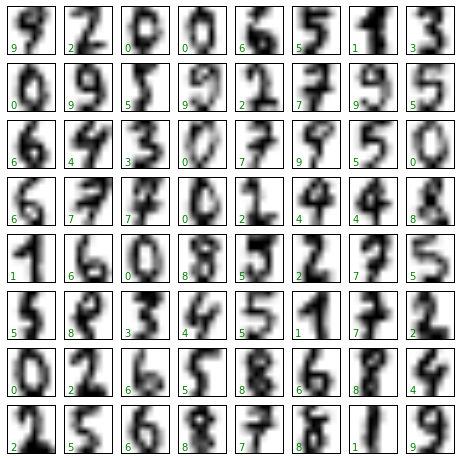

In [25]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(X_test.reshape(-1,8,8)[i],cmap=plt.cm.binary)
    if(y_test[i]==y_predict[i]):
        ax.text(0,7,str(y_predict[i]),color='green')
    else:
        ax.text(0,7,str(y_predict[i]),color='red')
    